# import libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,classification_report,roc_curve

import warnings
warnings.filterwarnings('ignore')

# 1.Problem statement

To predict whether the patient is having heart disease or not

# 2. Read the data

In [2]:
df = pd.read_csv("C:/Users/Aadarsh/OneDrive/Desktop/ETLHive/NOTE'S/ML/Superised ML/Cllasification/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3.EDA

In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

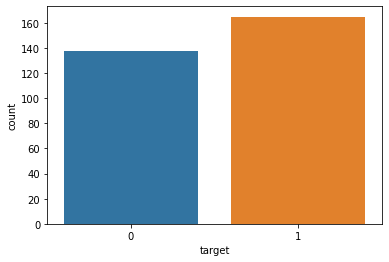

In [4]:
sns.countplot(df['target'])

# 4.Traintestsplit

In [5]:
x = df.drop('target',axis=1)
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
165/(138+165)

0.5445544554455446

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=35,stratify=y)

In [8]:
ytrain.value_counts()

1    124
0    103
Name: target, dtype: int64

In [9]:
124/(124+103)

0.5462555066079295

# 5. Model building

In [10]:
log_clf = LogisticRegression()
log_clf.fit(xtrain,ytrain)

LogisticRegression()

# 6. Model evaluation

confusion matrix: 
 [[26  9]
 [ 6 35]]
Confusion Matrix Plot <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001983FF1E7C0>
Accuracy: 0.8026315789473685
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.80      0.85      0.82        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



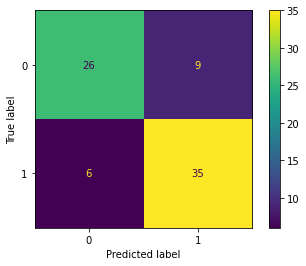

In [11]:
# Testing data evaluation
ypredtest = log_clf.predict(xtest)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix: \n',confusionmatrix)

confusionmatrix_plot= plot_confusion_matrix(log_clf,xtest,ytest)
print("Confusion Matrix Plot",confusionmatrix_plot)

accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',accuracy)

classificationreport = classification_report(ytest,ypredtest)
print('classification_report:\n',classificationreport)

confusion matrix: 
 [[ 80  23]
 [ 10 114]]
Confusion Matrix Plot <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000198433BDA30>
Accuracy: 0.8546255506607929
classification_report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       103
           1       0.83      0.92      0.87       124

    accuracy                           0.85       227
   macro avg       0.86      0.85      0.85       227
weighted avg       0.86      0.85      0.85       227



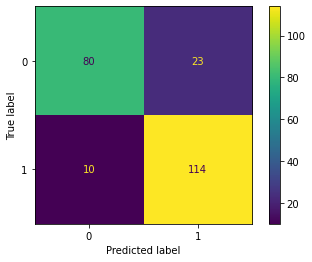

In [12]:
# Training data evaluation
ypredtrain = log_clf.predict(xtrain)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix: \n',confusionmatrix)

confusionmatrix_plot= plot_confusion_matrix(log_clf,xtrain,ytrain)
print("Confusion Matrix Plot",confusionmatrix_plot)


accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',accuracy)

classificationreport = classification_report(ytrain,ypredtrain)
print('classification_report:\n',classificationreport)

# Roc curve

In [13]:
ypredprob = log_clf.predict_proba(xtest)
ypredprob

array([[0.25819574, 0.74180426],
       [0.24448284, 0.75551716],
       [0.53864065, 0.46135935],
       [0.98565926, 0.01434074],
       [0.32247817, 0.67752183],
       [0.36831941, 0.63168059],
       [0.88061532, 0.11938468],
       [0.93925128, 0.06074872],
       [0.76792743, 0.23207257],
       [0.11053953, 0.88946047],
       [0.01513748, 0.98486252],
       [0.26658207, 0.73341793],
       [0.0750039 , 0.9249961 ],
       [0.99513035, 0.00486965],
       [0.098274  , 0.901726  ],
       [0.0794248 , 0.9205752 ],
       [0.81550469, 0.18449531],
       [0.12103398, 0.87896602],
       [0.03686802, 0.96313198],
       [0.05320092, 0.94679908],
       [0.95657904, 0.04342096],
       [0.42654947, 0.57345053],
       [0.53623157, 0.46376843],
       [0.60896291, 0.39103709],
       [0.98436182, 0.01563818],
       [0.12759118, 0.87240882],
       [0.26813464, 0.73186536],
       [0.04198314, 0.95801686],
       [0.87507146, 0.12492854],
       [0.02450745, 0.97549255],
       [0.

In [14]:
ypredtest

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [15]:
# ypredprob[rowindex,columnindex]
ypredprob[:,1]    # class-1 probabilities

array([0.74180426, 0.75551716, 0.46135935, 0.01434074, 0.67752183,
       0.63168059, 0.11938468, 0.06074872, 0.23207257, 0.88946047,
       0.98486252, 0.73341793, 0.9249961 , 0.00486965, 0.901726  ,
       0.9205752 , 0.18449531, 0.87896602, 0.96313198, 0.94679908,
       0.04342096, 0.57345053, 0.46376843, 0.39103709, 0.01563818,
       0.87240882, 0.73186536, 0.95801686, 0.12492854, 0.97549255,
       0.00732215, 0.04392103, 0.92856448, 0.43901693, 0.87273901,
       0.36446373, 0.63280912, 0.72082469, 0.01121451, 0.03969493,
       0.82922127, 0.82945464, 0.15292002, 0.86088523, 0.43953843,
       0.95521362, 0.93996216, 0.01396651, 0.08649688, 0.03420963,
       0.76115094, 0.90820502, 0.04726537, 0.75897593, 0.62175517,
       0.90826324, 0.9273171 , 0.59799247, 0.01787927, 0.90419682,
       0.73887671, 0.63564306, 0.67309885, 0.07512967, 0.00196867,
       0.84798813, 0.10857209, 0.97663857, 0.88806486, 0.9793919 ,
       0.91117248, 0.03977771, 0.44603652, 0.58577284, 0.48377

In [16]:
fpr,tpr,thresh = roc_curve(ytest,ypredprob[:,1])

In [17]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.05714286, 0.05714286, 0.08571429, 0.08571429, 0.2       ,
       0.2       , 0.25714286, 0.25714286, 0.28571429, 0.28571429,
       0.42857143, 0.42857143, 1.        ])

In [18]:
tpr

array([0.        , 0.02439024, 0.34146341, 0.34146341, 0.51219512,
       0.51219512, 0.6097561 , 0.6097561 , 0.80487805, 0.80487805,
       0.85365854, 0.85365854, 0.95121951, 0.95121951, 0.97560976,
       0.97560976, 1.        , 1.        ])

In [19]:
thresh

array([1.98486252e+00, 9.84862516e-01, 9.11172485e-01, 9.08263240e-01,
       8.72739007e-01, 8.72408823e-01, 8.29221265e-01, 7.61150936e-01,
       6.77521829e-01, 6.31680591e-01, 5.97992472e-01, 5.73450526e-01,
       4.46036525e-01, 4.39538433e-01, 4.39016932e-01, 1.52920019e-01,
       1.24928537e-01, 1.96866805e-03])

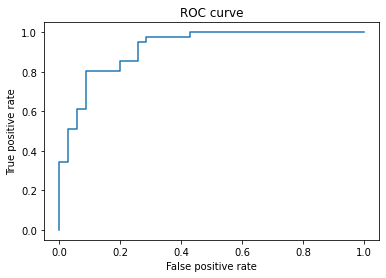

In [20]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.savefig('ROC_curve.png')